# Метод опорных векторов
## Цель работы
Изучить работу метода опорных векторов для решения задач классификации и регрессии, познакомиться с основными особенностями и вариациями данного метода. Изучить соответствующие классы библиотеки sklearn, их параметры и атрибуты, применимые на практике.

## Содержание работы
1. Сгенерируйте линейно разделимый датасет для классификации из двух признаков. Постройте на нем опорно-векторный классификатор без ядра с параметром С=100. Изобразите границу принятия решения и линию зазора на графике.
2. Сгенерируйте линейно неразделимый датасет с зазором между классами. Повторите виуальный анализ на нем.
3. Сгенерируйте неразделимый датасет так, чтобы классы пересекались. Повторите построение и оценку метода опорных векторов на нем.

### 1. Сгенерируйте линейно разделимый датасет для классификации из двух признаков. Постройте на нем опорно-векторный классификатор без ядра с параметром С=100. Изобразите границу принятия решения и линию зазора на графике.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
from sklearn.datasets import make_blobs

In [100]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

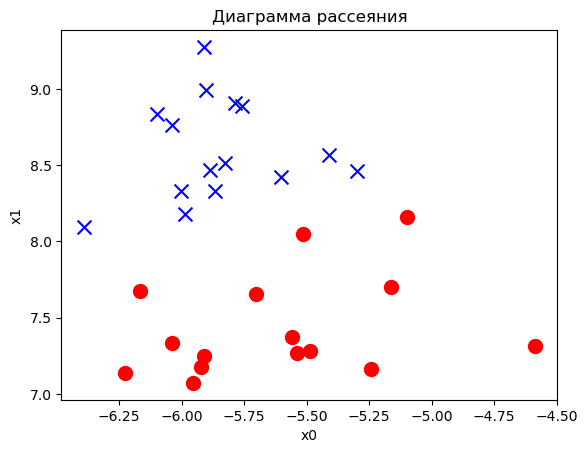

In [101]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [102]:
from sklearn.svm import SVC

In [103]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [104]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [105]:
svm_linear.intercept_

array([-64.2533988])

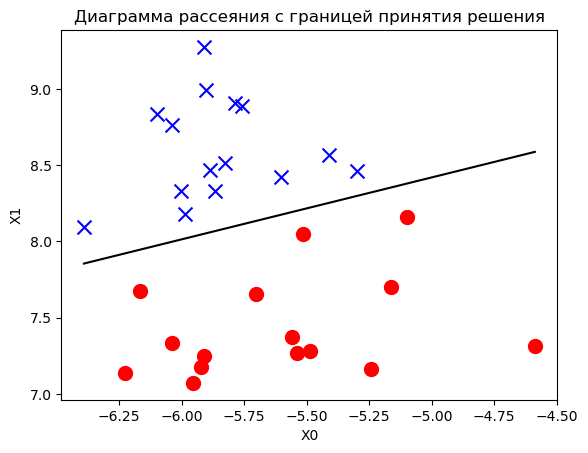

In [106]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Опорные вектора:

In [107]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

Индексы опорных векторов в исходном наборе данных:

In [108]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

Иногда бывает полезно узнать количество опорных векторов. Особенно в задачах множественной классификации, когда опорные вектора соответствуют разным классам. Для этого существует также специальное поле:

In [109]:
svm_linear.n_support_

array([1, 2], dtype=int32)

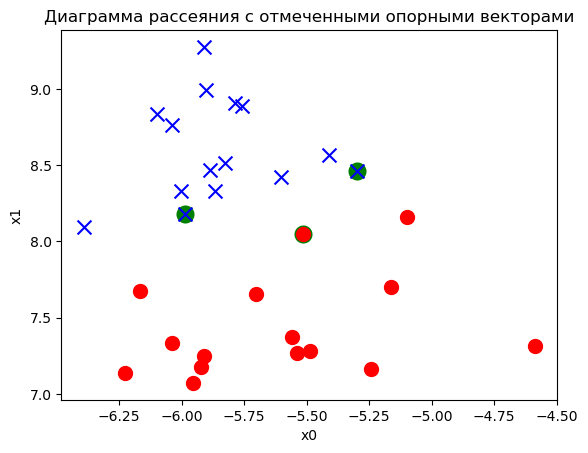

In [110]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

Если отступить отграницы принятия решений расстояние, соответствующее росту функции на единицу в обе стороны мы получим границы области зазора. Давайте построим эту границу:

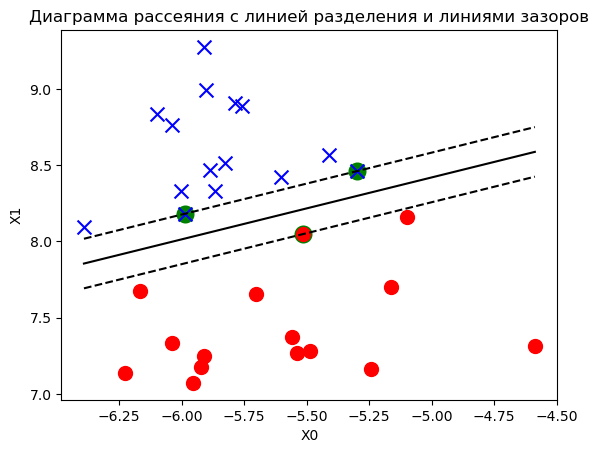

In [111]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Правильно троить границу принятия решения как линии уровня на поверхности фукнции гипотезы:

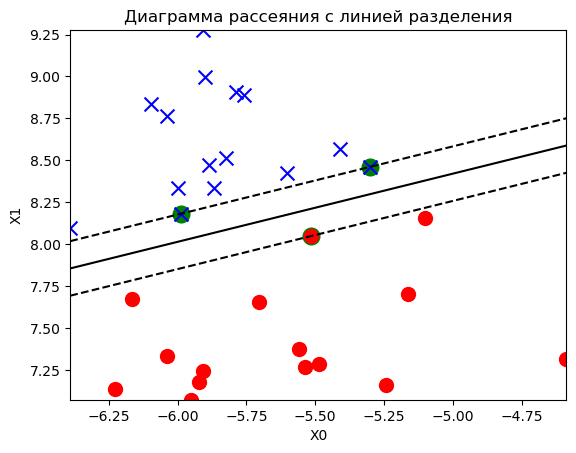

In [112]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Запишем в функцию:

In [113]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

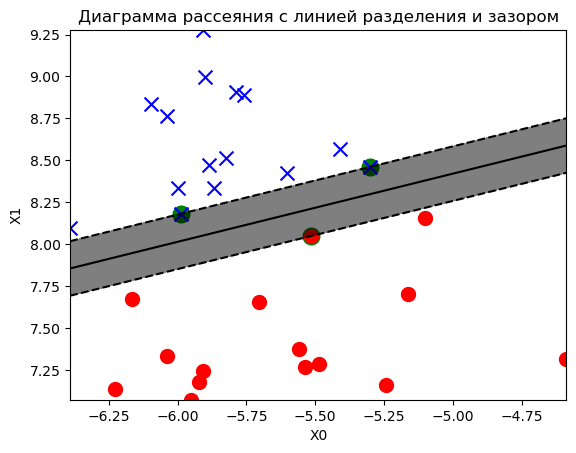

In [114]:
plot_decision_regions(X, y, svm_linear)

In [115]:
y_pred =  svm_linear.predict(X)

Оценка модели:

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [117]:
accuracy_score(y, y_pred)

1.0

In [118]:
confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

Проверим работу модели на новых вводных данных:

In [119]:
observation_new = [[-5.25, 7.5]]

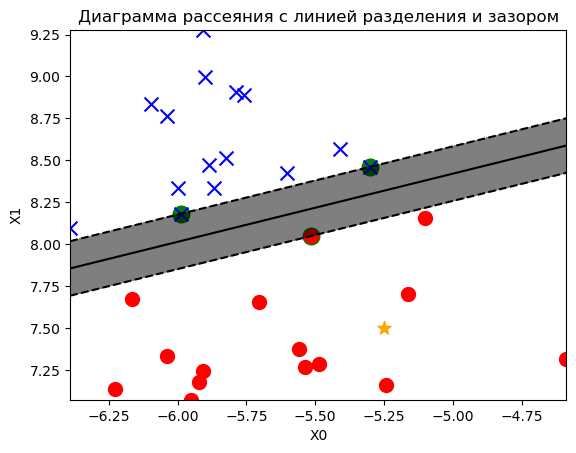

In [120]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

При помощи соответствующего метода класса найдет значение функции гипотезы в этой точке:

In [121]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

И конечно предсказание класса в ней же:

In [122]:
svm_linear.predict(observation_new)

array([0])

### 2. Сгенерируйте линейно неразделимый датасет с зазором между классами. Повторите виуальный анализ на нем.

In [123]:
from sklearn.datasets import make_circles

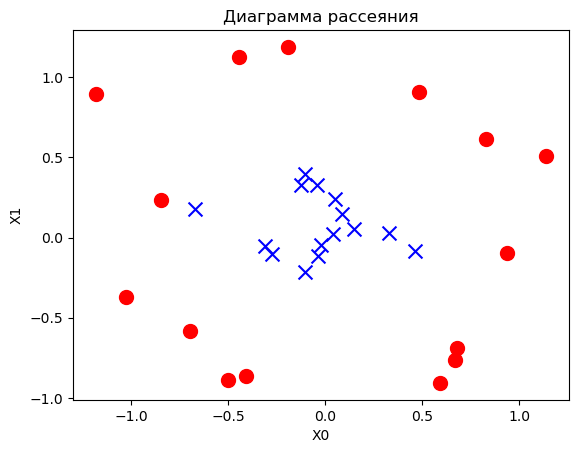

In [124]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Для этого набора данных воспользуемся методом опорных векторов в гауссовым ядром:

In [125]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [126]:
svm_rbf.n_support_

array([6, 2], dtype=int32)

In [127]:
svm_rbf.support_

array([11, 20, 21, 23, 28, 29, 25, 27], dtype=int32)

In [128]:
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

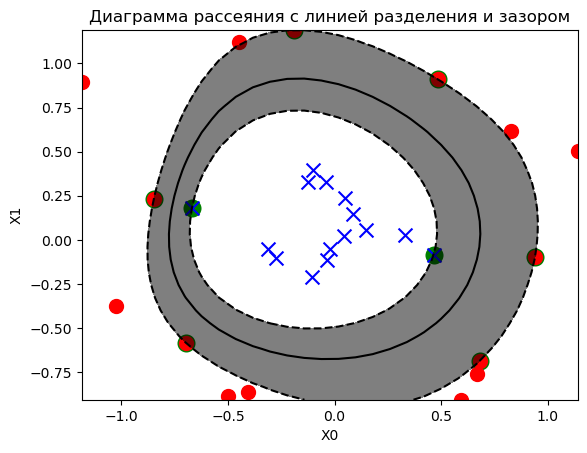

In [129]:
plot_decision_regions(X, y, svm_rbf)

In [130]:
accuracy_score(y, y_pred)

0.4666666666666667

In [131]:
confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

### 3. Сгенерируйте неразделимый датасет так, чтобы классы пересекались. Повторите построение и оценку метода опорных векторов на нем.

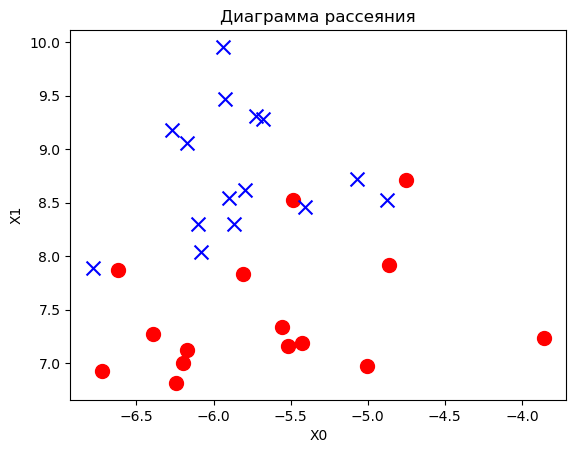

In [132]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [133]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

In [134]:
y_pred = svm_poly.predict(X)

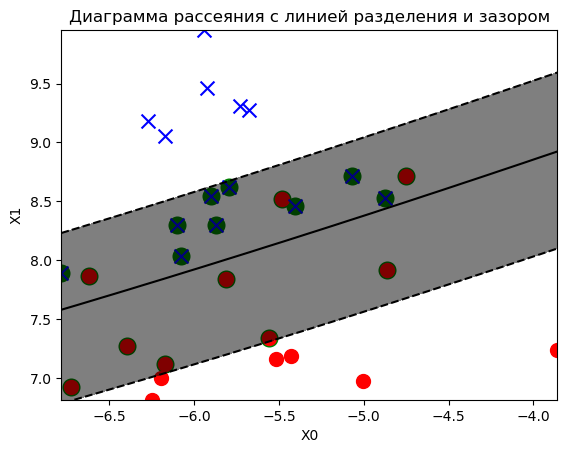

In [135]:
plot_decision_regions(X, y, svm_poly)

In [136]:
svm_poly.n_support_

array([9, 9], dtype=int32)

Можно сделать вывод, что чем меньше зазор между классами, тем менее эффективен метод опорных векторов.

In [137]:
accuracy_score(y, y_pred)

0.9

In [138]:
confusion_matrix(y, y_pred)

array([[12,  3],
       [ 0, 15]])

## Задания для самостоятельного выполнения

### 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

In [139]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

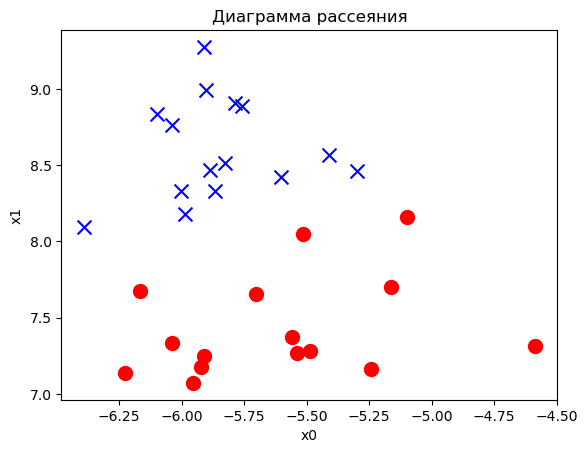

In [140]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

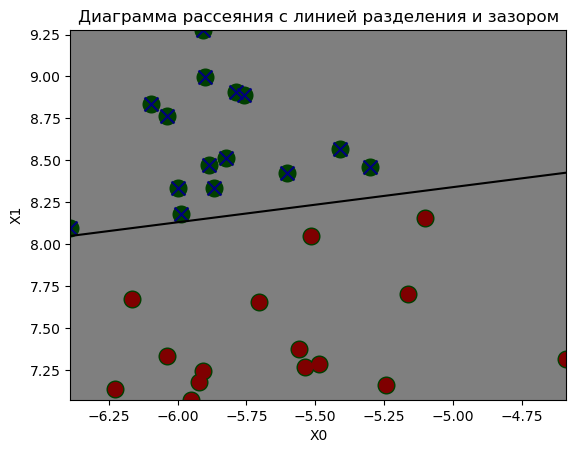


Accuracy=  1.0
[[15  0]
 [ 0 15]]


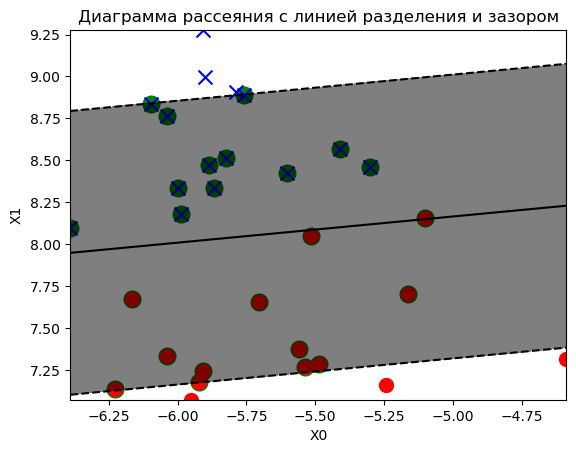


Accuracy=  0.9666666666666667
[[14  1]
 [ 0 15]]


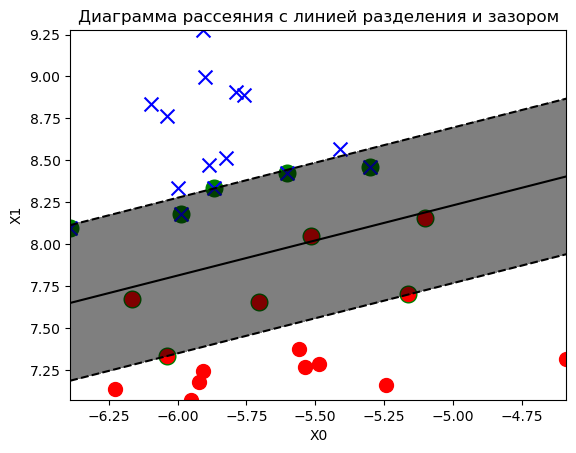


Accuracy=  0.9666666666666667
[[14  1]
 [ 0 15]]


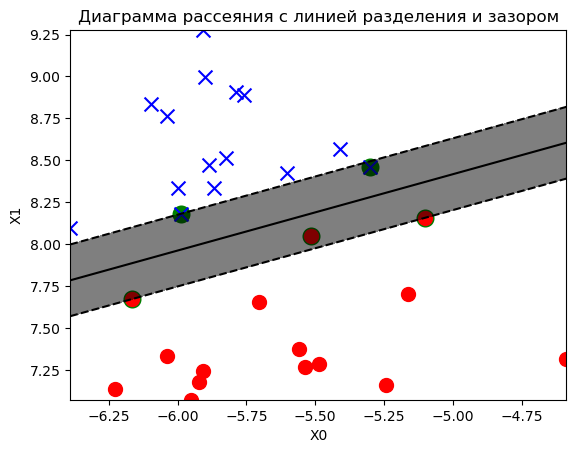


Accuracy=  1.0
[[15  0]
 [ 0 15]]


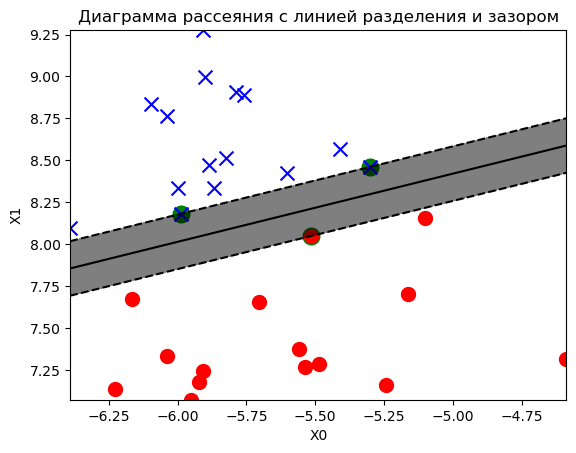


Accuracy=  1.0
[[15  0]
 [ 0 15]]


In [141]:
for c in [0.01, 0.1, 1, 10, 100]:
    svm_linear = SVC(kernel='linear', C=c)
    svm_linear.fit(X, y)
    plot_decision_regions(X, y, svm_linear)
    y_pred =  svm_linear.predict(X)
    print()
    print("Accuracy= ", accuracy_score(y, y_pred))
    print(confusion_matrix(y, y_pred))

### 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

In [142]:
observation_new = [[-5.25, 7.5], [-4, 8], [-3.2, 9,4]]

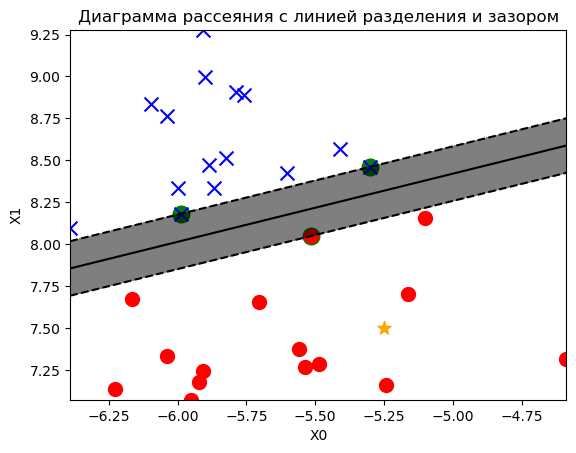

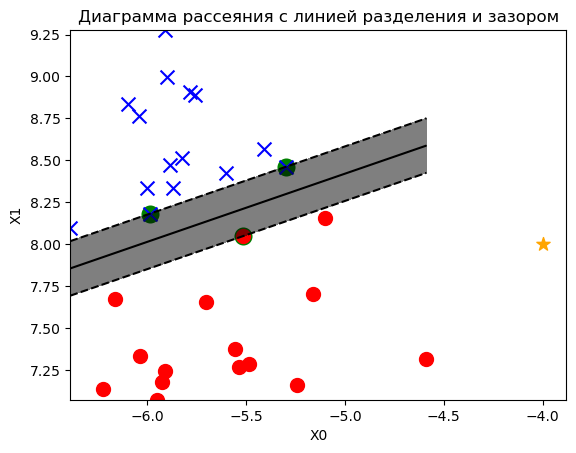

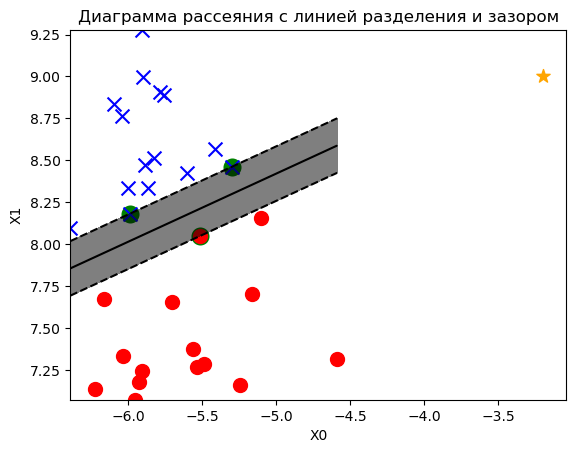

In [143]:
for o_n in observation_new:
    plt.scatter(o_n[0], o_n[1], marker='*', s=100, color='orange')
    plot_decision_regions(X, y, svm_linear)

При помощи соответствующего метода класса найдет значение функции гипотезы в этой точке:

И конечно предсказание класса в ней же:

In [144]:
svm_linear.predict(observation_new[:1])

array([0])

### 3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

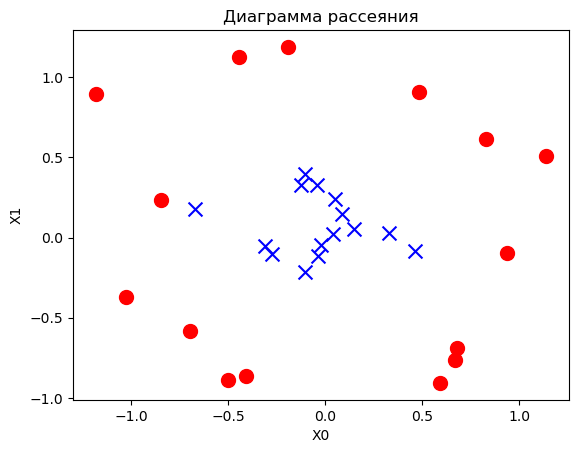

In [145]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [146]:
svm_linear = SVC(kernel='linear', C=100).fit(X, y)
svm_poly = SVC(kernel='poly', C=100).fit(X, y)

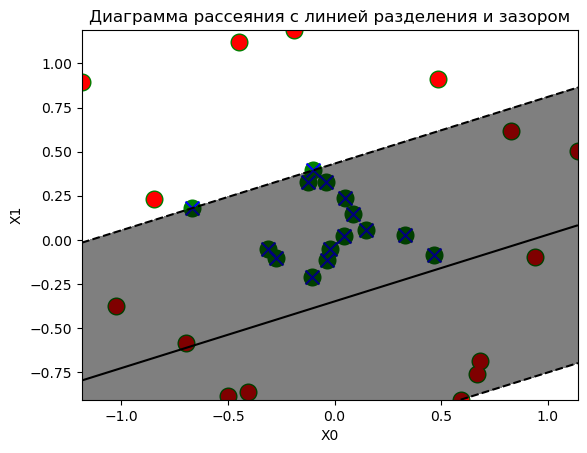

In [147]:
plot_decision_regions(X, y, svm_linear)

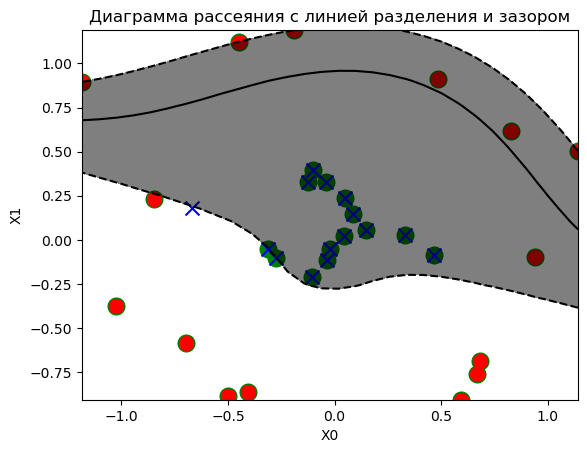

In [148]:
plot_decision_regions(X, y, svm_poly)

In [149]:
y_pred_linear = svm_linear.predict(X)
y_pred_poly = svm_poly.predict(X)

In [150]:
accuracy_score(y, y_pred_linear)

0.7

In [151]:
confusion_matrix(y,y_pred_linear)

array([[ 6,  9],
       [ 0, 15]])

In [152]:
accuracy_score(y, y_pred_poly)

0.7

In [153]:
confusion_matrix(y, y_pred_poly)

array([[ 6,  9],
       [ 0, 15]])

### 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайте вывод о том, как он влияет на модель.

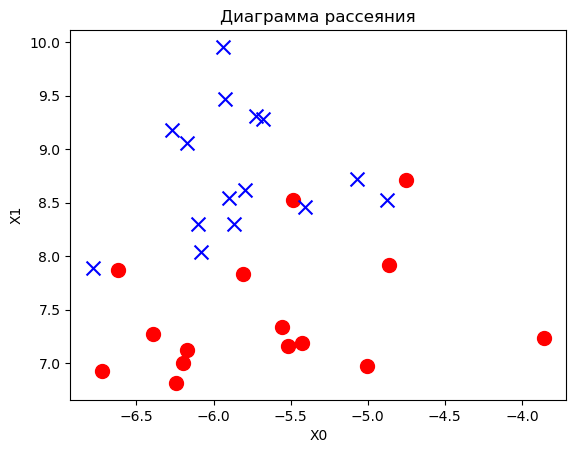

In [154]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

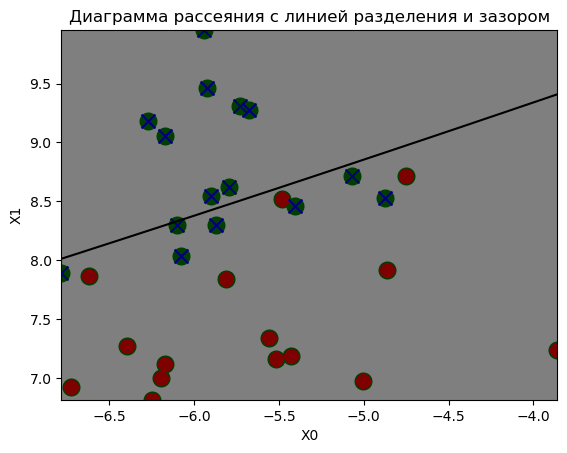


Accuracy=  0.7666666666666667
[[15  0]
 [ 7  8]]


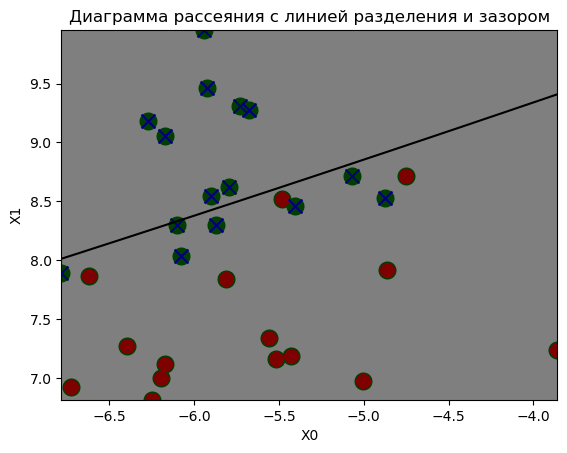


Accuracy=  0.7666666666666667
[[15  0]
 [ 7  8]]


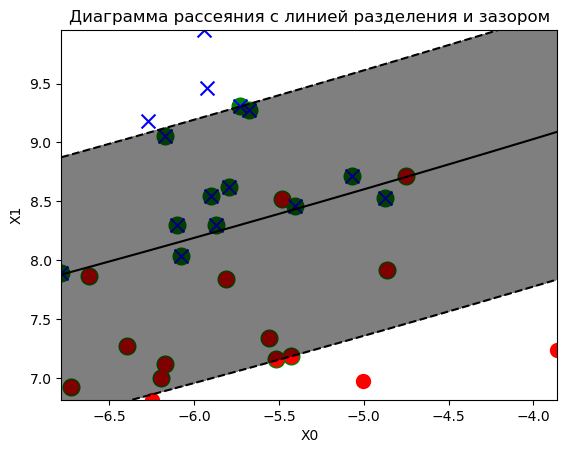


Accuracy=  0.8666666666666667
[[13  2]
 [ 2 13]]


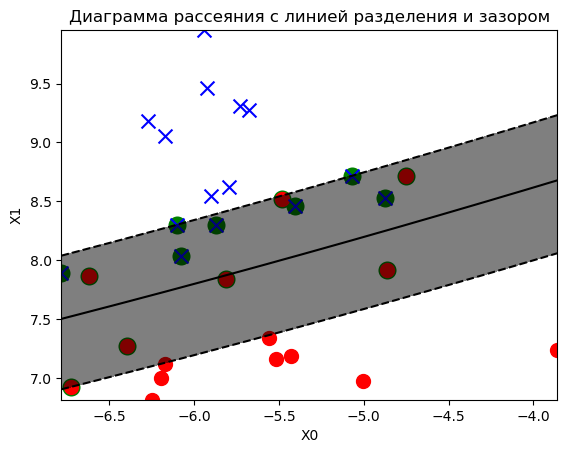


Accuracy=  0.9
[[12  3]
 [ 0 15]]


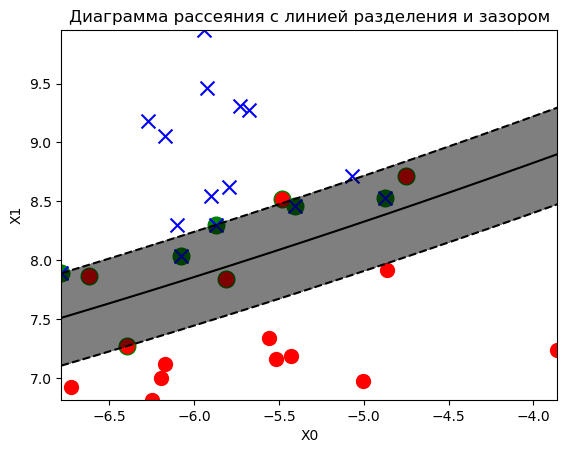


Accuracy=  0.9
[[12  3]
 [ 0 15]]


In [155]:
for c in [0.01, 0.1, 1, 10, 100]:
    svm_poly = SVC(kernel='poly', C=c).fit(X, y)
    plot_decision_regions(X, y, svm_poly)
    y_pred =  svm_poly.predict(X)
    print()
    print("Accuracy= ", accuracy_score(y, y_pred))
    print(confusion_matrix(y, y_pred))

### 5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

In [156]:
from sklearn.svm import LinearSVC

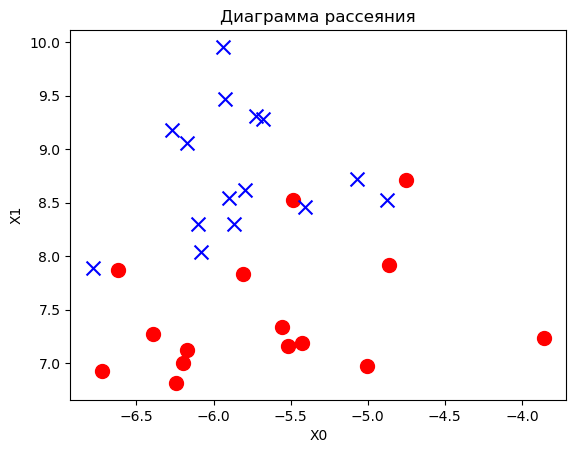

In [157]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [158]:
svm_linear = LinearSVC(C=100).fit(X, y)

/Users/egorprozorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [159]:
y_pred = svm_linear.predict(X)

In [160]:
accuracy_score(y, y_pred)

0.8333333333333334

In [161]:
confusion_matrix(y, y_pred)

array([[10,  5],
       [ 0, 15]])

### 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [162]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

In [163]:
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'poly', 'rbf']  
}

In [166]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [167]:
best_params = grid_search.best_params_
best_params

{'C': 100, 'kernel': 'rbf'}

In [168]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [169]:
best_params, accuracy

({'C': 100, 'kernel': 'rbf'}, 0.875)

### 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [170]:
import time 

In [171]:
sizes = [1000, 5000, 10000, 25000, 50000]
train_times = []

In [172]:
for n_samples in sizes:
    X, y = make_classification(n_samples=n_samples, n_features=5, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = SVC(C=100, kernel='rbf')
    
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    train_time = end_time - start_time
    train_times.append((n_samples, train_time))

In [173]:
tt_df = pd.DataFrame(train_times, columns=['n_samples', 'train_time'])
tt_df

,n_samples,train_time
0,1000,0.040857
1,5000,0.597706
2,10000,1.737236
3,25000,21.243641
4,50000,20.002652


### 8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

In [174]:
X, y = make_classification(n_samples=500, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [175]:
svm_model = SVC(kernel='rbf', C=1, decision_function_shape='ovo')
svm_model.fit(X, y)

SVC(C=1, decision_function_shape='ovo')

In [176]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 500),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 500))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

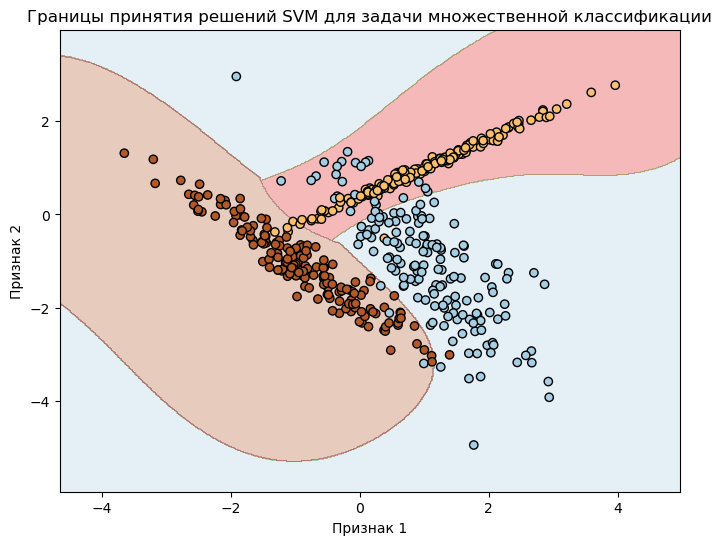

In [177]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.title("Границы принятия решений SVM для задачи множественной классификации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [178]:
accuracy_score(y, svm_model.predict(X))

0.924

### 9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [179]:
from sklearn.datasets import load_iris 
from sklearn.discriminant_analysis import StandardScaler

In [180]:
data = load_iris()

In [181]:
X = data.data
y = data.target

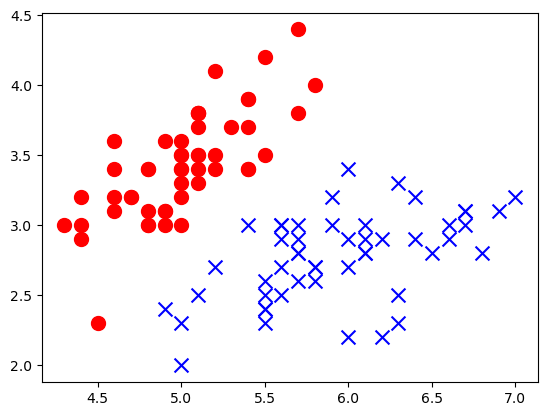

In [182]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

In [183]:
mask = y < 2
X_binary = X[mask]
y_binary = y[mask]

In [184]:
scaler = StandardScaler()
X_binary = scaler.fit_transform(X_binary)

In [185]:
svm_poly = SVC(kernel='poly', C=100, degree=3)
svm_poly.fit(X_binary, y_binary)

SVC(C=100, kernel='poly')

In [186]:
y_pred = svm_poly.predict(X_binary)
print("Accuracy=", accuracy_score(y_binary, y_pred))
print(confusion_matrix(y_binary, y_pred))

Accuracy= 1.0
[[50  0]
 [ 0 50]]


### 10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [187]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [188]:
data = fetch_california_housing()

In [189]:
X = data.data
y = data.target

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_linear = SVR(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

In [ ]:
y_pred =svm_linear.predict(X_test)
print("MSE=", mean_squared_error(y_test, y_pred))
print("R2=", r2_score(y_test, y_pred))

MSE= 0.5792242326685152
R2= 0.5579820939214954


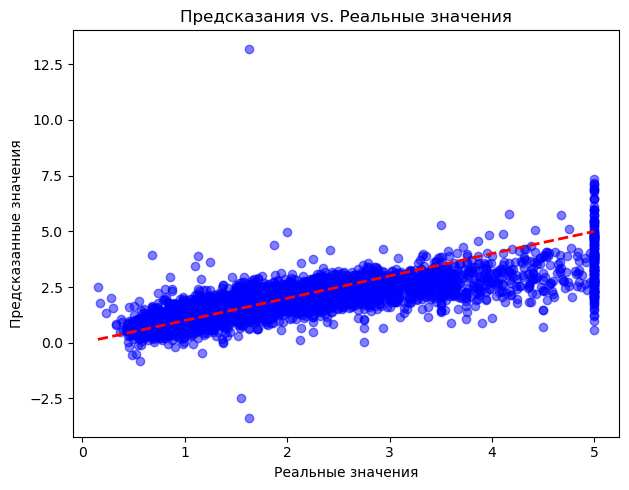

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Предсказания vs. Реальные значения")
plt.tight_layout()
plt.show()

**1. Чем отличается класс SVC и LinearSVC в библиотеке sklearn при использовании метода опорных векторов без ядра?**  
- `SVC(kernel='linear')` реализует метод опорных векторов с использованием ядрового трюка и поддерживает как линейные, так и нелинейные ядра, но работает медленнее на больших выборках.  
- `LinearSVC` использует другую реализацию (на основе метода оптимизации liblinear), что делает её быстрее и более масштабируемой для линейных задач, но она не поддерживает ядровой трюк.

**2. Чем отличается метод опорных векторов с разными ядрами? Как выбор функции ядра влияет на форму границы принятия решения?**  
Метод опорных векторов с разными ядрами изменяет способ отображения данных в более высокое измерение:  
- Линейное ядро (`linear`) — граница решений прямая.  
- Полиномиальное ядро (`poly`) — граница решений полиномиальной формы.  
- Радиальное базисное ядро (RBF, `rbf`) — позволяет строить гибкие, изогнутые границы, хорошо подходит для сложных распределений данных.  
Выбор ядра определяет форму и сложность границы разделения классов.

**3. Как метод опорных векторов работает в задачах множественной классификации?**  
Метод SVM применяет один из подходов:
- One-vs-Rest (OvR): обучается один классификатор на каждый класс против всех остальных.
- One-vs-One (OvO): обучается классификатор для каждой пары классов.  
Затем для предсказания применяется схема голосования или выбор по максимальному отклику.

**4. Как метод опорных векторов может быть использован для решения задачи регрессии?**  
В регрессии используется вариант SVM, называемый Support Vector Regression (SVR).  
SVR ищет функцию, которая отклоняется от истинных значений не более чем на ε, минимизируя при этом сложность модели. Используется "ε-инсенситивная зона", в пределах которой ошибки не штрафуются. Также возможна настройка ядра для захвата нелинейных зависимостей.